# 核磁気共鳴（NMR）と核四重極共鳴（NQR）  

（初版：2020年3月、更新：2023年2月21日）  

原子核は電気的にも磁気的にも中性ではない。外場と原子核の間に生じる相互作用として、下記の3つがある。  

　・ゼーマン相互作用  
　・核四重極相互作用  
　・超微細相互作用  

### ゼーマン相互作用  

　核磁気モーメント $\boldsymbol{\mu}_n$ と外部磁場 $\boldsymbol{H}_0$ による、磁気的な相互作用。  

### 核四重極相互作用  

　核四重極モーメント $eQ$ と核周りの電場勾配 $V_{\alpha \alpha}$ $(\alpha = x, y, z)$ による、電気的な相互作用。
 

### 超微細相互作用 

　対象原子核とその周り（他の原子核や電子など）の間に生じる相互作用。  
　物質の性質を調べる上で非常に重要で、実験的にはこれが知りたい。ここでは触れません。

　
# ゼーマン相互作用
ゼーマン相互作用のハミルトニアンは以下のように書ける。  

　　$\mathcal{H}_Z = -\boldsymbol{\mu}_n \cdot \boldsymbol{H}_0 = -\gamma_n h \boldsymbol{I} \cdot \boldsymbol{H}_0$　　

ここで、$\boldsymbol{I}$ は核スピンである。  

磁場方向を $z$ 軸とすると、ハミルトニアンは  

　　$\mathcal{H}_Z = -\gamma_n h H_0 \boldsymbol{I}_z$　　

と書け、固有エネルギーは  

　　$E_m = - \gamma_n h H_0 m$  

となる。$m$ は磁気量子数である。  
$I = \frac{3}{2}$ （ $m = 3/2 \sim -3/2$ ）の場合の行列表示は、  

　　$ \mathcal{H}_Z = -\gamma_n h H_0
    \left[\begin{array}{cccc}
        \frac{3}{2} & 0 & 0 & 0 \\
        0 & \frac{1}{2} & 0 & 0 \\
        0 & 0 & -\frac{1}{2} & 0 \\
        0 & 0 & 0 & -\frac{3}{2} \\
        \end{array}\right]
$

と書け、対角行列なのでそれぞれの値が固有値（固有エネルギー）となる。  
隣接準位間のエネルギー差は  

　　$\Delta E = \gamma_n h H_0$  

となり、等間隔である。  
よって、共鳴周波数は以下のようになる。  

　　$\nu =\Delta E/ h = \gamma_n H_0$  

これを、julia上で書くと以下のようになる。

In [1]:
γn = 10.0; #核磁気回転比（MHz/T）
h  = 1.0; #プランク定数。共鳴周波数にするときにhで割るので、１にしておく。
H0 = 1.0; #外部磁場（T）
IZ = [+3/2 0 0 0;
        0 +1/2 0 0;
        0 0 -1/2 0;
        0 0 0 -3/2]
Ene = -γn*h*H0*IZ # 固有エネルギーの行列要素
ΔE = [Ene[1,1], Ene[2,2], Ene[3,3], Ene[4,4]] #エネルギー準位（MHz単位）
ν = [ΔE[4]-ΔE[3], ΔE[3]-ΔE[2], ΔE[2]-ΔE[1]] #共鳴周波数（MHz）

3-element Vector{Float64}:
 10.0
 10.0
 10.0

　
# 核四重極相互作用
核四重極相互作用のハミルトニアンは以下のように書ける。  

　　$\mathcal{H}_Q = \frac{h\nu_Q}{6}[ 3I_z^2 - I^2 +\frac{\eta}{2}(I_+^2 + I_-^2) ]$  

ここで、$\nu_Q \equiv 3eQV_{zz}/2I(2I-1)h$ は核四重極モーメント、$\eta \equiv (V_{xx}-V_{yy})/V_{zz}$ は非対称パラメータである。  
$\eta \neq 0$ の場合、ハミルトニアンの行列要素に非対角成分があるため、対角化して固有エネルギーを求める必要がある。  

$I = \frac{3}{2}$の時のハミルトニアンの行列要素は、  

　　$ \mathcal{H}_Q = h\nu_Q
    \left[\begin{array}{cccc}
        \frac{1}{2} & 0 & \frac{\eta}{2\sqrt{3}} & 0 \\
        0 & -\frac{1}{2} & 0 & \frac{\eta}{2\sqrt{3}} \\
        \frac{\eta}{2\sqrt{3}} & 0 & -\frac{1}{2} & 0 \\
        0 & \frac{\eta}{2\sqrt{3}} & 0 & \frac{1}{2} \\
        \end{array}\right]
$

となる。この場合は解析的に対角化できて、固有エネルギーは  

　　$E_{\pm\frac{3}{2}} = \frac{h\nu_Q}{2}\sqrt{1+\frac{\eta^2}{3}}$、$E_{\pm\frac{1}{2}} = -\frac{h\nu_Q}{2}\sqrt{1+\frac{\eta^2}{3}}$  

となる。
隣接準位間のエネルギー差は  

　　$\Delta E = h\nu_Q\sqrt{1+\frac{\eta^2}{3}}$  

であるので、共鳴周波数 $\nu$ は  

　　$\nu =\Delta E/ h = \nu_Q\sqrt{1+\frac{\eta^2}{3}}$  

となる。  

これを、julia上で書くと以下のようになる。

In [2]:
νQ = 10.0; #核四重極周波数（MHz）
η = 0.0; #非対称パラメータ（0≦|η|≦1）
h  = 1.0; #プランク定数。共鳴周波数にするときにhで割るので、１にしておく。
Hami = h*νQ*[1/2 0 η/(2*sqrt(3)) 0;
        0 -1/2 0 η/(2*sqrt(3));
        η/(2*sqrt(3)) 0 -1/2 0;
        0 η/(2*sqrt(3)) 0 1/2] #ハミルトニアンの行列要素

4×4 Matrix{Float64}:
 5.0   0.0   0.0  0.0
 0.0  -5.0   0.0  0.0
 0.0   0.0  -5.0  0.0
 0.0   0.0   0.0  5.0

In [3]:
using LinearAlgebra
Eval, Evec = eigen(Hami) #固有値と固有行列を求める

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 -5.0
 -5.0
  5.0
  5.0
vectors:
4×4 Matrix{Float64}:
 0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0

In [4]:
ν = [Eval[3]-Eval[1], Eval[4]-Eval[2]] #共鳴周波数（MHz）

2-element Vector{Float64}:
 10.0
 10.0

$I = \frac{5}{2}$ などについても、$\mathcal{H}_Q$ の行列要素を求め対角化することにより、共鳴周波数を求めることができる。  
$|\pm m\rangle$ のエネルギーが縮退するため、$I$ が半整数の場合、共鳴線の数は $(I-1/2)$ 本となる。  

　
# ゼーマン相互作用＋核四重極相互作用
前述の2つの相互作用がある場合の共鳴周波数を求める。  
「 $I = \frac{3}{2}$ で $H_0 \parallel V_{zz}$ 」の場合を考える。  
ハミルトニアンは  

　　$\mathcal{H} = \mathcal{H}_Z + \mathcal{H}_Q = -\gamma_n h H_0 \boldsymbol{I}_z + \frac{h\nu_Q}{6}[ 3I_z^2 - I^2 +\frac{\eta}{2}(I_+^2 + I_-^2) ]$  

であり、行列要素で書くと  

　　$ \mathcal{H} = 
    \left[\begin{array}{cccc}
        -\frac{3}{2}\gamma_n h H_0 + \frac{1}{2}h\nu_Q & 0 & \frac{\eta}{2\sqrt{3}} & 0 \\
        0 & -\frac{1}{2}\gamma_n h H_0 -\frac{1}{2}h\nu_Q & 0 & \frac{\eta}{2\sqrt{3}} \\
        \frac{\eta}{2\sqrt{3}} & 0 & \frac{1}{2}\gamma_n h H_0 -\frac{1}{2}h\nu_Q & 0 \\
        0 & \frac{\eta}{2\sqrt{3}} & 0 & \frac{3}{2}\gamma_n h H_0 + \frac{1}{2}h\nu_Q\\
        \end{array}\right]
$  

となる。対角化して固有エネルギーを求めて、その差から共鳴周波数が計算できる。  
これを、julia上で書くと以下のようになる。

In [5]:
γn = 10.0; #核磁気回転比（MHz/T）
H0 = 10.0; #外部磁場（T）
νQ = 10.0; #核四重極周波数（MHz）
η = 0.0; #非対称パラメータ（0≦|η|≦1）
h  = 1.0; #プランク定数。共鳴周波数にするときにhで割るので、１にしておく。

HamiZ = -γn*h*H0*[+3/2 0 0 0;
        0 +1/2 0 0;
        0 0 -1/2 0;
        0 0 0 -3/2] #ゼーマン相互作用

HamiQ = [h*νQ/2 0 h*η*νQ/(2*sqrt(3)) 0;
        0 -h*νQ/2 0 h*η*νQ/(2*sqrt(3));
        h*η*νQ/(2*sqrt(3)) 0 -h*νQ/2 0;
        0 h*η*νQ/(2*sqrt(3)) 0 h*νQ/2] #核四重極相互作用

Hami = HamiZ + HamiQ #全体のハミルトニアン

4×4 Matrix{Float64}:
 -145.0    0.0   0.0    0.0
    0.0  -55.0   0.0    0.0
    0.0    0.0  45.0    0.0
    0.0    0.0   0.0  155.0

In [6]:
using LinearAlgebra #前に実行してあれば、もう一度読み込む必要は無い
Eval, Evec = eigen(Hami) #固有値と固有行列を求める

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 -145.0
  -55.0
   45.0
  155.0
vectors:
4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

これまでは適当に固有値を引き算して共鳴周波数を求めていたが、色々と複雑になると真面目に遷移確率を計算する必要が出てくる。  
$|m\rangle \leftrightarrow |m'\rangle$ の遷移確率 $I_{m,m'}$ は  

　　$I_{m,m'} \propto |\langle m|I_x |m'\rangle|^2$  

であるので、固有ベクトルと演算子 $I_x$ から求めることができる。  
$I = \frac{3}{2}$ の時の $I_x$ の行列要素は  

　　$ I_x = 
    \left[\begin{array}{cccc}
        0 & \frac{\sqrt{3}}{2} & 0 & 0 \\
        \frac{\sqrt{3}}{2} & 0 & 1 & 0 \\
        0 & 1 & 0 & \frac{\sqrt{3}}{2} \\
        0 & 0 & \frac{\sqrt{3}}{2} & 0 \\
        \end{array}\right]
$  

である。
先に計算した固有値と固有ベクトルについて共鳴周波数と遷移確率は以下のようになる。

In [7]:
Ix = [0 sqrt(3)/2 0 0;
        sqrt(3)/2 0 1 0;
        0 1 0 sqrt(3)/2;
        0 0 sqrt(3)/2 0]

#共鳴周波数の計算
f1 = abs(Eval[1] - Eval[2])
f2 = abs(Eval[1] - Eval[3])
f3 = abs(Eval[1] - Eval[4])
f4 = abs(Eval[2] - Eval[3])
f5 = abs(Eval[2] - Eval[4])
f6 = abs(Eval[3] - Eval[4])
#遷移確率の計算
p1 = (Evec[:,1]'*Ix*Evec[:,2])^2
p2 = (Evec[:,1]'*Ix*Evec[:,3])^2
p3 = (Evec[:,1]'*Ix*Evec[:,4])^2
p4 = (Evec[:,2]'*Ix*Evec[:,3])^2
p5 = (Evec[:,2]'*Ix*Evec[:,4])^2
p6 = (Evec[:,3]'*Ix*Evec[:,4])^2

println("freq. = ", f1, " MHz, prob. = ", p1)
println("freq. = ", f2, " MHz, prob. = ", p2)
println("freq. = ", f3, " MHz, prob. = ", p3)
println("freq. = ", f4, " MHz, prob. = ", p4)
println("freq. = ", f5, " MHz, prob. = ", p5)
println("freq. = ", f6, " MHz, prob. = ", p6)

freq. = 90.0 MHz, prob. = 0.7499999999999999
freq. = 190.0 MHz, prob. = 0.0
freq. = 300.0 MHz, prob. = 0.0
freq. = 100.0 MHz, prob. = 1.0
freq. = 210.0 MHz, prob. = 0.0
freq. = 110.0 MHz, prob. = 0.7499999999999999


ガウス関数を畳み込んだ共鳴スペクトルは以下のようになる。

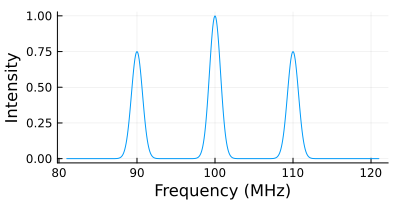

In [8]:
using Plots
gr()

freq0 = [f1, f2, f3, f4, f5, f6];
prob0 = [p1, p2, p3, p4, p5, p6];
freq1 = freq0[prob0 .> 0] #遷移確率ゼロのところは消しとく
prob1 = prob0[prob0 .> 0] #遷移確率ゼロのところは消しとく

n = length(freq1) #ピークの数
w0 = 1 #線幅に関する定数
divf = 500 #周波数の分割数
fmin = minimum(freq1)*0.9 #計算する周波数範囲（下限）
fmax = maximum(freq1)*1.1 #計算する周波数範囲（上限）

calcfreq = (fmin:(fmax-fmin)/divf:fmax)
calcint = calcfreq*0
for x in 1:n
    calcint = calcint + prob1[x]*exp.(-(calcfreq .- freq1[x]).^2 ./ w0)
end

plot(calcfreq, calcint, size = (400, 200))
plot!(xlabel = "Frequency (MHz)", ylabel = "Intensity", legend = false)

上記はなるべく何を計算しているのかを分かりやすく書いてあります。  
ガチで計算するときには巧く書いて、利便性をあげた方が良いです。